In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
coca = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [104]:
coca.shape

(42, 2)

In [105]:
coca.duplicated().sum()

0

In [106]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [107]:
coca.rename(columns = {'Quarter' : 'Quarter_Date'}, inplace = True)
coca.head()

,Quarter_Date,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [108]:
# Extract 'Quarter' and 'Year' using regular expressions
coca[['Quarter', 'Year']] = coca['Quarter_Date'].str.extract(r'Q(\d)_(\d{2})')

# Convert the 'Year' to a 4-digit format (assuming '86' corresponds to '1986')
coca['Year'] =  '19' + coca['Year']

# Create a date string with the first day of the quarter
coca['Date'] = coca['Year'] + '-' + coca['Quarter'].map({'1': '01', '2': '04', '3': '07', '4': '10'})

# Convert the date string to datetime
coca['Date'] = pd.to_datetime(coca['Date'], format='%Y-%m')

# # Change data type to int
# coca['Quarter'] = coca['Quarter'].astype(int)
# coca['Year'] = coca['Year'].astype(int)

In [109]:
coca.head(10)

,Quarter_Date,Sales,Quarter,Year,Date
0,Q1_86,1734.827000,1,1986,1986-01-01
1,Q2_86,2244.960999,2,1986,1986-04-01
2,Q3_86,2533.804993,3,1986,1986-07-01
3,Q4_86,2154.962997,4,1986,1986-10-01
4,Q1_87,1547.818996,1,1987,1987-01-01
5,Q2_87,2104.411995,2,1987,1987-04-01
6,Q3_87,2014.362999,3,1987,1987-07-01
7,Q4_87,1991.746998,4,1987,1987-10-01
8,Q1_88,1869.049999,1,1988,1988-01-01
9,Q2_88,2313.631996,2,1988,1988-04-01


In [110]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter_Date  42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter       42 non-null     object        
 3   Year          42 non-null     object        
 4   Date          42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.8+ KB


In [111]:
# Extract the year, month as number, quarter and month as name
coca['Year'] = coca['Date'].dt.year
coca['Month_of_Year'] = coca['Date'].dt.month # extraction of months as number
coca['Quarter'] = coca['Date'].dt.quarter
coca["Month"] = coca['Date'].dt.strftime("%b") # extraction of months as name

In [112]:
coca.head(10)

,Quarter_Date,Sales,Quarter,Year,Date,Month_of_Year,Month
0,Q1_86,1734.827000,1,1986,1986-01-01,1,Jan
1,Q2_86,2244.960999,2,1986,1986-04-01,4,Apr
2,Q3_86,2533.804993,3,1986,1986-07-01,7,Jul
3,Q4_86,2154.962997,4,1986,1986-10-01,10,Oct
4,Q1_87,1547.818996,1,1987,1987-01-01,1,Jan
5,Q2_87,2104.411995,2,1987,1987-04-01,4,Apr
6,Q3_87,2014.362999,3,1987,1987-07-01,7,Jul
7,Q4_87,1991.746998,4,1987,1987-10-01,10,Oct
8,Q1_88,1869.049999,1,1988,1988-01-01,1,Jan
9,Q2_88,2313.631996,2,1988,1988-04-01,4,Apr


In [113]:
# Calculate the sequential month number
coca['Sequential_Months'] = (coca['Year'] - coca['Year'].min()) * 12 + coca['Month_of_Year']
coca.head()

,Quarter_Date,Sales,Quarter,Year,Date,Month_of_Year,Month,Sequential_Months
0,Q1_86,1734.827000,1,1986,1986-01-01,1,Jan,1
1,Q2_86,2244.960999,2,1986,1986-04-01,4,Apr,4
2,Q3_86,2533.804993,3,1986,1986-07-01,7,Jul,7
3,Q4_86,2154.962997,4,1986,1986-10-01,10,Oct,10
4,Q1_87,1547.818996,1,1987,1987-01-01,1,Jan,13


In [114]:
# Create dummy columns for months
month_dummies = pd.get_dummies(coca['Month_of_Year'], prefix='Month') # drop_first=True

# Rename the dummy columns to match the desired format
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Rename the columns using a dictionary
month_rename_dict = {f'Month_{i}': month_names[i - 1] for i in range(1, 13)}
month_dummies = month_dummies.rename(columns=month_rename_dict)

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([coca, month_dummies], axis=1)
df.head()

,Quarter_Date,Sales,Quarter,Year,Date,Month_of_Year,Month,Sequential_Months,Jan,Apr,Jul,Oct
0,Q1_86,1734.827000,1,1986,1986-01-01,1,Jan,1,1,0,0,0
1,Q2_86,2244.960999,2,1986,1986-04-01,4,Apr,4,0,1,0,0
2,Q3_86,2533.804993,3,1986,1986-07-01,7,Jul,7,0,0,1,0
3,Q4_86,2154.962997,4,1986,1986-10-01,10,Oct,10,0,0,0,1
4,Q1_87,1547.818996,1,1987,1987-01-01,1,Jan,13,1,0,0,0


In [115]:
df.drop(columns = ['Month_of_Year'], inplace = True)

df.head()

,Quarter_Date,Sales,Quarter,Year,Date,Month,Sequential_Months,Jan,Apr,Jul,Oct
0,Q1_86,1734.827000,1,1986,1986-01-01,Jan,1,1,0,0,0
1,Q2_86,2244.960999,2,1986,1986-04-01,Apr,4,0,1,0,0
2,Q3_86,2533.804993,3,1986,1986-07-01,Jul,7,0,0,1,0
3,Q4_86,2154.962997,4,1986,1986-10-01,Oct,10,0,0,0,1
4,Q1_87,1547.818996,1,1987,1987-01-01,Jan,13,1,0,0,0


<Axes: xlabel='Sequential_Months', ylabel='Sales'>

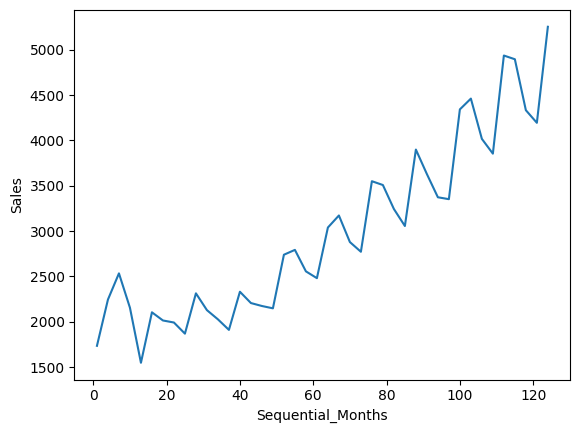

In [116]:
sns.lineplot(x= df['Sequential_Months'], y= df['Sales'])

### Coca Cola Sales data shows (over the period)
- upward trend
- multiplicative seasonality

In [117]:
pivot = pd.pivot_table(data=df, values="Sales", index="Year", columns="Month", fill_value=0)
pivot

Month,Apr,Jan,Jul,Oct
Year,,,,
1986,2244.960999,1734.827000,2533.804993,2154.962997
1987,2104.411995,1547.818996,2014.362999,1991.746998
1988,2313.631996,1869.049999,2128.320000,2026.828999
1989,2331.164993,1910.603996,2206.549995,2173.967995
1990,2739.307999,2148.278000,2792.753998,2556.009995
1991,3039.522995,2480.973999,3172.115997,2879.000999
1992,3550.000000,2772.000000,3508.000000,3243.859993
1993,3899.000000,3056.000000,3629.000000,3373.000000
1994,4342.000000,3352.000000,4461.000000,4017.000000


<Axes: xlabel='Month', ylabel='Year'>

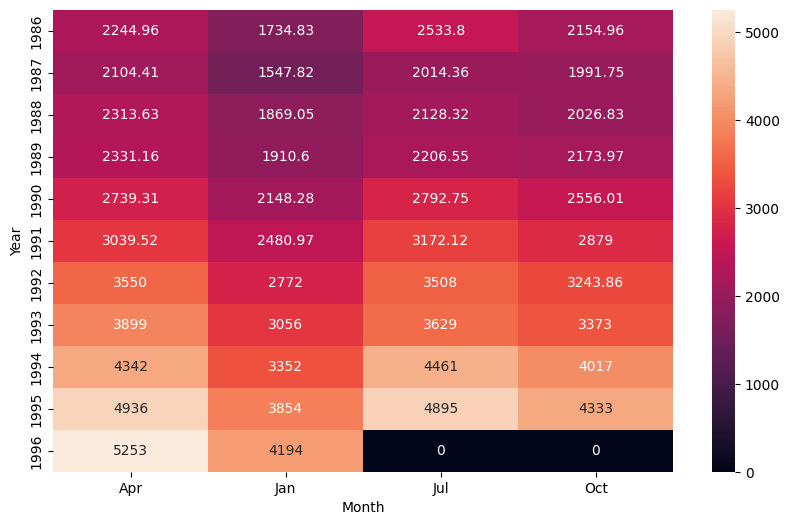

In [118]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="g")

### In the 2nd Quarter (April to June month) of every year there is very high Sales of Coca Cola, which is obvious as it is summer time and beverages demands are usually at peak during this time

<Axes: xlabel='Year', ylabel='Sales'>

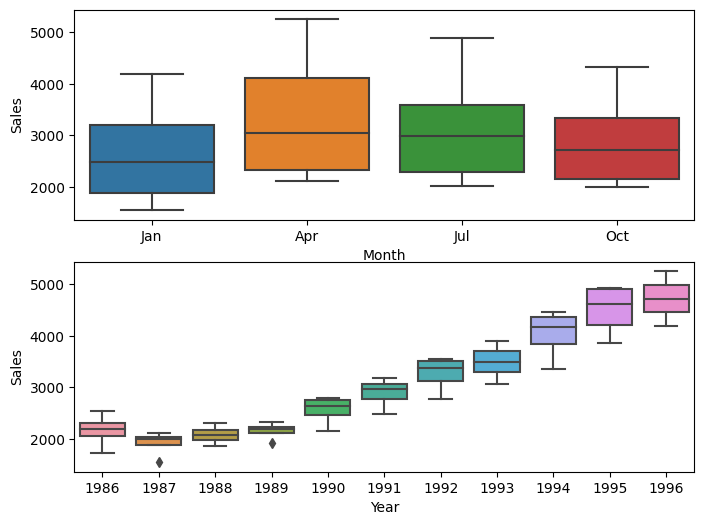

In [119]:
# Boxplots
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x = "Month", y = "Sales", data = df)
plt.subplot(212)
sns.boxplot(x = "Year", y = "Sales", data = df)

<Axes: xlabel='Year', ylabel='Sales'>

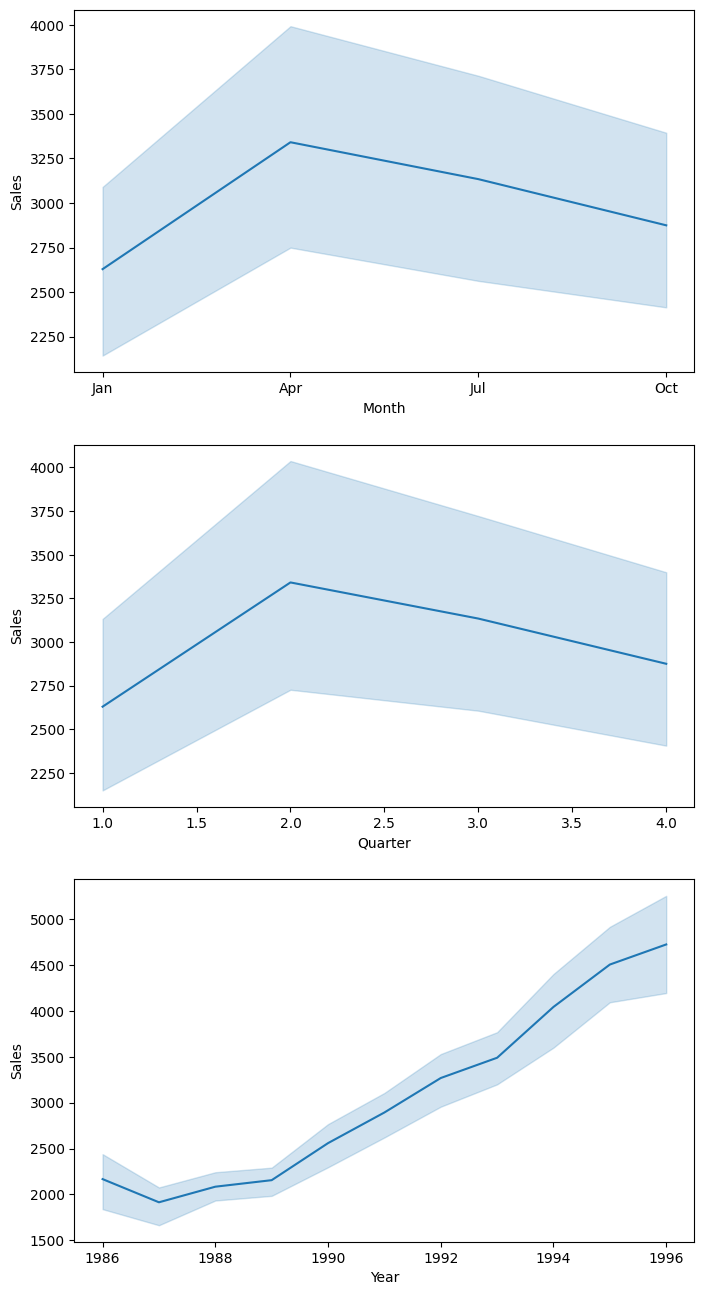

In [120]:
plt.figure(figsize=(8,16))
plt.subplot(311)
sns.lineplot(x = "Month", y = "Sales", data = df)
plt.subplot(312)
sns.lineplot(x = "Quarter", y = "Sales", data = df)
plt.subplot(313)
sns.lineplot(x = "Year", y = "Sales", data = df)

### During the initial years there has been dip in the sales of Coca Cola. It may be due to Coca Cola was new to the market and there would have been hesitancy from the customer side but later as it may have gain popularity its sail are approximately exponentially rising.

#Splitting of data

In [121]:
df.shape

(42, 11)

In [122]:
# manual splitting of data in 75:25 ratio for train and test

n1= int(0.75*df.shape[0])
n2= int(0.25*df.shape[0])
Train = df.head(n1)
Test = df.tail(n2)

print(Train.shape), print(Test.shape)

(31, 11)
(10, 11)


(None, None)

In [123]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~Sequential_Months', data = Train).fit()

pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Sequential_Months'])))

rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


742.4653093049549

# improve accuarcy by using Linear Transformations

In [124]:
df.columns

Index(['Quarter_Date', 'Sales', 'Quarter', 'Year', 'Date', 'Month',
       'Sequential_Months', 'Jan', 'Apr', 'Jul', 'Oct'],
      dtype='object')

In [125]:
#Exponential Transformations

Expo_model = smf.ols('np.log(Sales)~Sequential_Months', data = Train).fit()

input  = pd.DataFrame(Test['Sequential_Months'])

pred_Expo = np.exp(Expo_model.predict(input))

predicted = np.array(pred_Expo)

actual = Test['Sales'].values

rmse_Expo = np.sqrt(np.mean((actual - predicted)**2))
rmse_Expo

572.3734372809153

In [126]:
#Quadratic Transformations

Quad_model = smf.ols('Sales~Sequential_Months**2+Sequential_Months', data = Train).fit()

input = pd.DataFrame(Test[['Sequential_Months']])
input['Sequential_Months_squared'] = Test['Sequential_Months'] ** 2

pred_Quad = pd.Series(Quad_model.predict(input))
predicted = np.array(pred_Quad)

actual = Test['Sales'].values


rmse_Quad = np.sqrt(np.mean((actual - predicted)**2))
rmse_Quad


742.4653093049549

In [127]:
#Additive seasonality
add_seas_model = smf.ols('Sales~Jan+Apr+Jul+Oct', data = Train).fit()

input  = Test[['Jan', 'Apr', 'Jul', 'Oct']]

pred_add_seas = pd.Series(add_seas_model.predict(input))
predicted = np.array(pred_add_seas)

actual = Test['Sales'].values

rmse_add_seas = np.sqrt(np.mean((actual - predicted)**2))
rmse_add_seas


1871.7435386758375

In [128]:
# Additive Seasonality Quadratic

add_sea_Quad_model = smf.ols('Sales~Sequential_Months+np.square(Sequential_Months)+Jan+Apr+Jul+Oct', data=Train).fit()

input  = pd.DataFrame(Test[['Jan', 'Apr', 'Jul', 'Oct', 'Sequential_Months']])
input['Sequential_Months_squared']= Test['Sequential_Months'] ** 2

pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(input))

predicted = np.array(pred_add_sea_quad)

actual = Test['Sales'].values

rmse_add_seas_quad = np.sqrt(np.mean((actual - predicted)**2))
rmse_add_seas_quad

436.08762743956186

In [129]:
# Multiplicative Seasonality

Mul_seas_model = smf.ols('np.log(Sales)~Jan+Apr+Jul+Oct',data = Train).fit()

input  = pd.DataFrame(Test[['Jan', 'Apr', 'Jul', 'Oct']])

pred_Mult_sea = np.exp(Mul_seas_model.predict(Test))

predicted = np.array(pred_Mult_sea)

actual = Test['Sales'].values

rmse_Mult_sea = np.sqrt(np.mean((actual - predicted)**2))
rmse_Mult_sea

1927.1326220319695

In [130]:
#Multiplicative Additive Seasonality

Mul_Add_seas_model = smf.ols('np.log(Sales)~Sequential_Months+Jan+Apr+Jul+Oct',data = Train).fit()

input  = pd.DataFrame(Test[['Sequential_Months','Jan', 'Apr', 'Jul', 'Oct']])

pred_Mul_Add_seas = np.exp(Mul_seas_model.predict(input))

predicted = np.array(pred_Mul_Add_seas)

actual = Test['Sales'].values

rmse_Mult_add_sea = np.sqrt(np.mean((actual - predicted)**2))
rmse_Mult_add_sea

1927.1326220319695

In [131]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Expo","rmse_Quad","rmse_add_seas","rmse_add_seas_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Expo,rmse_Quad,rmse_add_seas,rmse_add_seas_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_seas_quad,436.087627
1,rmse_Expo,572.373437
0,rmse_linear,742.465309
2,rmse_Quad,742.465309
3,rmse_add_seas,1871.743539
5,rmse_Mult_sea,1927.132622
6,rmse_Mult_add_sea,1927.132622


### Out of all model built, Multiplicative additive seasonality model is best model

# Re-building of model based on Additive Seasonality Quadratic model


<Axes: >

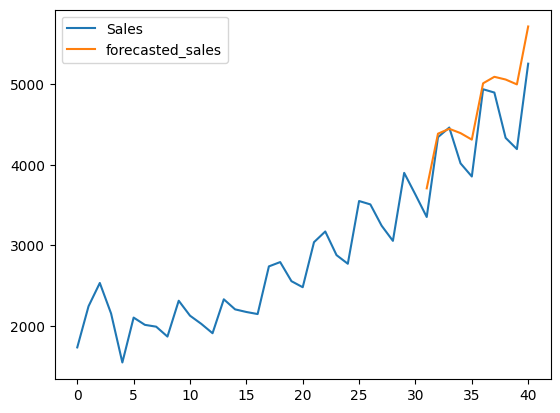

In [132]:
# Additive Seasonality Quadratic

add_sea_Quad_model = smf.ols('Sales~Sequential_Months+np.square(Sequential_Months)+Jan+Apr+Jul+Oct', data=Train).fit()

input_test  = pd.DataFrame(Test[['Jan','Apr','Jul','Oct', 'Sequential_Months']])
input_test['Sequential_Months_squared']= Test['Sequential_Months'] ** 2

pred_test = pd.Series(add_sea_Quad_model.predict(input))

predict_data = pd.DataFrame(Test)
predict_data["forecasted_sales"] = pd.Series(pred_test)

new_var = pd.concat([Train, predict_data])

new_var[['Sales','forecasted_sales']].reset_index(drop=True).plot()

In [133]:
df.columns

Index(['Quarter_Date', 'Sales', 'Quarter', 'Year', 'Date', 'Month',
       'Sequential_Months', 'Jan', 'Apr', 'Jul', 'Oct'],
      dtype='object')

# Observations
### Dummy Variables
- following are the Dummy Variables were made for our model building and visualisations
- 'Quarter', 'Year', 'Date', 'Month', 'Sequential_Months', 'Jan', 'Apr', 'Jul', 'Oct'
- Quarter Column were made for quarterly obseravtions
- Month column for monthly observations
- Year column for yearly observations
- 'Sequential_Months' column was made for getting squence of months in order to get continuity in monthly data points
- 'Jan', 'Apr', 'Jul', 'Oct' dummy columns were made for getting Sales visualisations over the YoY data points

### info from data
- In the 2nd Quarter (April to June month) of every year there is very high Sales of Coca Cola, which is obvious as it is summer time and beverages demands are usually at peak during this time
- During the initial years there has been dip in the sales of Coca Cola. It may be due to Coca Cola was new to the market and there would have been hesitancy from the customer side but later as it may have gain popularity its sail are approximately exponentially rising.
- Coca Cola Sales data shows (over the period) upward trend & multiplicative seasonality

### Best Model
- Out of all model built, Multiplicative additive seasonality model is best model
- model is predicting slightly above sales, which shows that if an organisation is running upon such model then organisation will be on safer side as it will meet the end users demand very efficiently without any delay which will increase popularity amnong customers but it may have neagtive implications on business like inventory building, cost shooting etc.